<a href="https://colab.research.google.com/github/ifmg-betim/2022.2_AUT.040_ProcSin/blob/main/Ex/Ex05_modulacao_SEU_NOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex05 - `Iury Kischka Mendes` - `0040411`

(De)Modulação e (De)Multiplexação.

**HONESTIDADE ACADÊMICA**

Todo o trabalho feito no sentido do cumprimento das expectativas deste curso deve ser exclusivamente seu. A colaboração de terceiros na realização dos trabalhos não é permitida.

Ver ou copiar o trabalho de outro indivíduo do curso ou retirar material de um livro, site ou outra fonte, mesmo em parte e apresentá-lo como seu próprio constitui desonestidade acadêmica, assim como mostrar ou dar a sua obra, mesmo em parte, a outro estudante. Da mesma forma, é desonestidade acadêmica fornecer ou tornar as soluções disponíveis dos trabalhos para os indivíduos que fazem ou poderão fazer este curso no futuro. Você está convidado a discutir o material do curso com os outros, a fim de melhor compreendê-lo. Você pode até discutir sobre os trabalhos com os colegas, mas você não pode compartilhar códigos, funções, projetos, tabelas, desenhos esquemáticos, mapas ou diagramas.

Você pode e deve recorrer à Web para obter referências na busca de soluções para os trabalhos, mas não por soluções definitivas para os problemas. No entanto, deve-se citar explicitamente no projeto a origem de qualquer procedimento ou técnica que você descubra fora do curso.

Todas as formas de desonestidade acadêmica são tratadas com rigor.

**Instruções:**
- Não apague os comentários existentes, mas você pode adicionar outros comentários.
- Ao representar sinais na frequência sugiro não usar amplitude em dB não e também não é obrigatório representar a "fase" do sinal
- Ao representar sistemas, deve-se representar o diagrama de Bode, com módulo e fase

**Objetivos**
- Implementar (de)modulação e (de)multiplexação de sinais

# Insira seu RA

<mark>**Faça:** escreva seu RA na variável `RA` abaixo.</mark>

*Obs.: não inclua os zeros à esquerda do RA não! E não use nenhuma outra variável com nome `RA`.*

In [4]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 1 linha de código)
RA = 40411
### FIM DO CÓDIGO ###

# Interceptando um sinal de um navio espião

Neste trabalho você tem um desafio: projetar um sistema para decodificar um sinal.

<img src="https://cloudfront-us-east-1.images.arcpublishing.com/archetype/IUG2BXYAWNGAPAAE7MOBQZW6RI.jpg" alt="circuito" width="300"/>

Foi detectado e gravado um sinal transmitido pelo navio acima. Informações da agência secreta dizem que o sinal gravado contém um código importante que precisa ser interpretado. Sabe-se também que o sinal original é sonoro, com banda 1500 Hz, e que o navio só consegue transmitir sinais AM-DSB em frequências inferiores a 22 kHz (era um navio antigo...).

<mark>**Faça:** rode o código abaixo para obter o sinal interceptado e ouça o sinal.</mark>

In [5]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt, IPython.display as ipd, requests
arq = requests.get('https://github.com/ifmg-betim/2022.2_AUT.040_ProcSin/raw/main/Ex/Ex05_codigo.py')
open("Ex05_codigo.py", "wb").write(arq.content); del arq;
import Ex05_codigo

sinal, fs = Ex05_codigo.capturaSinalSecreto(RA)

ipd.Audio(sinal, rate=fs, normalize=True)

___
No código acima, o sinal interceptado está na variável `sinal` e a variável `fs` contém a frequência de amostragem em Hz. Lembre-se da relação entre período de amostragem $T$ e frequência de amostragem $f_s$, conforme abaixo:
$$T = \frac{1}{f_s} .$$
Essa relação será útil para você montar o vetor tempo e apresentar o sinal.

<mark>**Faça:** usando procedimentos adequados, mostre abaixo o gráfico do sinal interceptado no domínio do tempo.</mark>

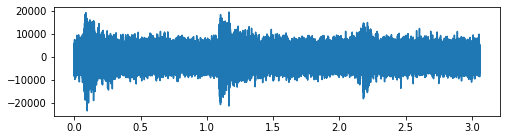

In [35]:
### SEU CÓDIGO COMEÇA AQUI ###
T = 1/fs
N=len(sinal)
t1 = np.arange(0, N*T, T) #vetor de tempo (segundos)
# tempo = np.linspace(0, T, 1)
plt.figure(figsize=(8,2))
plt.plot(t1, sinal);

### SEU CÓDIGO TERMINA AQUI ###

___
Como visto em aula, o domínio da frequência é muito útil para analisarmos sinais e algumas propriedades de interesse. É o que faremos agora. Sugiro não usar escala logarítmica de frequências e nem colocar a amplitude em dB não.

<mark>**Faça:** usando procedimentos adequados, mostre abaixo o sinal interceptado no domínio da frequência.</mark>

In [36]:
### SEU CÓDIGO COMEÇA AQUI ###
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft

def fourier(x, t, Hz=False, dB=False, deg=False, Nfft=None):

    N = len(x)

    if Nfft == None:
      Nfft = N

    X_f = fft(x, n=Nfft)
    X_f = X_f/N # corrige amplitude do sinal
    X_f = X_f[:Nfft//2]
    X_f[1:] = 2*X_f[1:]

    if Hz == True:
      f0 = 1/(Nfft*T) #freq em Hz
      fHz = np.arange(Nfft)*f0 #freq em Hz
      f = fHz[:Nfft//2]
    else:
      w0 = 2*np.pi/(Nfft*T) #freq em rad/s
      wRad = np.arange(Nfft)*w0 #freq em rad/s
      f = wRad[:Nfft//2]

    if dB == True:
      mag = 20*np.log10(np.abs(X_f)) #modulo no dominio da frequencia em dB
    else:
      mag = np.abs(X_f) #modulo no dominio da frequencia em dB
      
    if deg == True:
      pha = np.angle(X_f, deg=1) #fase no dominio da frequencia 
    else:
      pha = np.angle(X_f, deg=0)
           
    return mag, pha, f;
### SEU CÓDIGO TERMINA AQUI ###

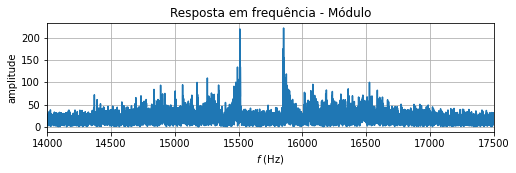

In [43]:
### SEU CÓDIGO COMEÇA AQUI ###

mag1, pha1, f1 = fourier(sinal, T, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia

plt.figure(figsize=(8,2))
plt.plot(f1, mag1)
plt.title("Resposta em frequência - Módulo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.xlim(14000,17500)
plt.grid(1);

### SEU CÓDIGO TERMINA AQUI ###

___
Agora, analise o sinal obtido no domínio da frequência. Sabemos que ali contém uma mensagem codificada em alguma forma de modulação. Descubra o tipo de modulação que foi utilizada e a frequência da portadora. No seu código, gere figuras com tamanho e ampliação adequadas que evidenciem qual a frequência da portadora do sinal e qual o tipo de modulação que foi utilizado.

<mark>**Faça:** usando procedimentos adequados, gere figuras que evidenciem o tipo de modulação e frequência utilizada. As figuras geradas no código abaixo servem para embasar sua reposta da próxima pergunta abaixo na sequência.</mark>

In [50]:
### SEU CÓDIGO COMEÇA AQUI ###

fp1 = 15800
fp2 = 17500
fr1 = 15600
fr2 = 17600

Gp = -1 #dB log(Sp^20) = Gp
Gr = -50 #dB
dp = 1-(10**(Gp/20))
dr = 10**(Gr/20)
Ap = -Gp #dB
Ar = -Gr #dB

wp1 = fp1*(2*np.pi) #rad/s
wp2 = fp2*(2*np.pi) #rad/s
wr1 = fr1*(2*np.pi) #rad/s
wr2 = fr2*(2*np.pi) #rad/s




ord1, wn1 = signal.buttord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)
ord2, wn2 = signal.cheb1ord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)
ord3, wn3 = signal.cheb2ord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)
ord4, wn4 = signal.ellipord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)

print(ord1, ord2, ord3, ord4)

### SEU CÓDIGO TERMINA AQUI ###

61 16 16 7


___
<mark>**Faça:** responda às questões abaixo.</mark>

**1. Qual o tipo de modulação utilizado? Justifique baseado no gráfico gerado acima.**

**Resposta:**

`[escreva aqui sua resposta]`

**2. Qual a frequência de modulação? Justifique baseado no gráfico gerado acima.**

**Resposta:**

`[escreva aqui sua resposta]`

**3. Como você vai decodificar o sinal? Explique textualmente, com o máximo de detalhes possível, todos os passos a serem utilizados para obter os sinal transmitido.**

**Resposta:**

`[escreva aqui sua resposta]`

___
# Decodificando o sinal

Use as células abaixo para projetar um sistema que faça a decodificação do sinal de acordo com o tipo de modulação e a frequência de portadora indentificada. Você pode usar qualquer uma das técnicas abordadas na disciplina (filtragem, demodulação, demultiplexação, etc.), mas atenção para as regras abaixo.

**REGRAS DE PROJETO**:
1. Só podem ser utilizados sistemas analógicos implementáveis na prática. Isso exclui, por exemplo, filtros ideais ou sistemas não causais.
1. Ao projetar filtros, é obrigatório mostrar o diagrama de Bode (amplitude em dB e escala logaritmica no eixo de frequências, em Hz) do filtro, com tamanho `figsize=(10,4)`, e, no mesmo gráfico, o ***sombreamento referente às especificações do filtro***. Você mesmo deve determinar as especificações de modo a atender o problema e também escolher o tipo de filtro a ser implementado. **ATENÇÃO**: filtros de ordem superiores a 7 demoram para rodar. Tente não usar filtros de ordem elevada.
1. Ao passar um sinal por um sistema (filtro, (de)modulador, (de)multiplexador, etc.), é obrigatório mostrar, num mesmo gráfico com tamanho `figsize=(10,1.5)`, o módulo da FFT do sinal antes e após o processo de filtragem. Mostrar a fase de sinais é facultativo. Sugere-se não representar o sinal em dB.
1. Nesta parte do trabalho você pode usar **até cinco células de código para cada uma das subseções abaixo**. Não é necessário mais que isso, mas você pode usar menos (apague as vazias nesse caso).
1. Todos os gráficos devem ter rótulos nos eixos e escala de ampliação adequada!
1. Organize seu código com comentários

<mark>**Faça:** usando procedimentos adequados, decodifique o sinal. Ao final, você deve mostrar o sinal decodificado no domínio do tempo E no domínio da frequência.</mark>

In [10]:
### SEU CÓDIGO COMEÇA AQUI ###
...
### SEU CÓDIGO TERMINA AQUI ###

In [11]:
### SEU CÓDIGO COMEÇA AQUI ###
...
### SEU CÓDIGO TERMINA AQUI ###

In [12]:
### SEU CÓDIGO COMEÇA AQUI ###
...
### SEU CÓDIGO TERMINA AQUI ###

In [13]:
### SEU CÓDIGO COMEÇA AQUI ###
...
### SEU CÓDIGO TERMINA AQUI ###

In [14]:
### SEU CÓDIGO COMEÇA AQUI ###
...
### SEU CÓDIGO TERMINA AQUI ###

___
Espera-se que, nessa etapa, você já tenha o sinal decodificado. Atribua o sinal decodificado e recuperado na variável `sinal_rec` abaixo. Em seguida, execute o código e ouça o sinal recuperado no player abaixo.


<mark>**Faça:** Atribua o sinal decodificado e recuperado na variável `sinal_rec` e ouça a mensagem do navio.</mark>

In [15]:
### SEU CÓDIGO COMEÇA AQUI ### ()
sinal_rec = ...
### SEU CÓDIGO TERMINA AQUI ###

ipd.Audio(sinal_rec, rate=fs, normalize=True)

TypeError: ignored

___
<mark>**Faça:** responda à questão abaixo.</mark>

**4. O que diz a mensagem transmitida?**

**Resposta:**

`[escreva aqui sua resposta]`

____

# Desafio: enganando o receptor da mensagem (não é obrigatório!)

**Modulação/Multiplexação**. Para tentar enganar o receptor da mensagem, pegue a mensagem decodificada no trabalho, altere a mensagem (invertendo as mensagens, por exemplo) e faça a modulação na mesma frequência de portadora. Explique textualmente os sistemas utilizados e mostre todos os sinais. Use quantas células quiser.

`[escreva aqui o que foi feito na alteração da mensagem, modulação, filtragem, etc...]`

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###
None
### SEU CÓDIGO TERMINA AQUI ###

Parabéns por ter completado o trabalho :c)